 #  Вариант 10

# Задание 2: информационное исследование процессов

In [3]:
import numpy as np
import math
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [4]:
a, b, c, d, m1, w1, θ1, m2, w2, θ2, m3, w3, θ3, m4, w4, θ4, m5, \
w5, θ5, m6, w6, θ6 = -1, 0.1, -2, 0.2, 3, np.pi / 12, 2, 1, \
9 * np.pi/8, 1, 0.5, 7, 0, 2, -np.pi / 12, 1, 1, 3 * np.pi / 8, \
2, 0.5, 8, 1

In [5]:
def X0(t):
    return a + b * t + m1 * np.sin(w1*t+θ1) + m2 * np.sin(w2*t+θ2) + m3 * np.sin(w3*t+θ3)

def Y0(t):
    return c + d * t + m4 * np.sin(w4*t+θ4) + m5 * np.sin(w5*t+θ5) + m6 * np.sin(w6*t+θ6)

## Задача 1

Нарисуйте график функций X0 (t), Y0 (t) на промежутке времени [0, 50]. 

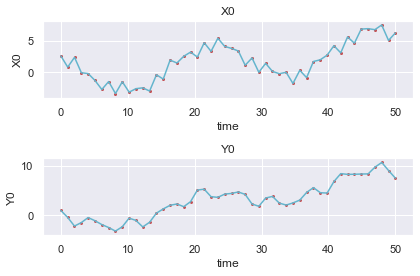

In [6]:
t_array = np.linspace(0, 50, 50)
plt.subplot(2, 1, 1)
plt.plot(t_array, X0(t_array), c = 'c')
plt.scatter(t_array, X0(t_array), s = 4, c = 'r')
plt.xlabel('time')
plt.ylabel('X0')
plt.title('X0')

plt.subplot(2, 1, 2)
plt.plot(t_array, Y0(t_array), c = 'c')
plt.scatter(t_array, Y0(t_array), s = 3.5, c = 'r')
plt.xlabel('time')
plt.ylabel('Y0')
plt.title('Y0')
plt.tight_layout()
plt.show()

## Задача 2

In [7]:
x_array = X0(t_array)
y_array = Y0(t_array)

## Задача 3

Методом наименьших квадратов найдите наилучшие линейные приближения : 
Xj ≈ α + β t; Yj ≈ γ + δ t

In [8]:
A = np.vstack([t_array, np.ones(len(t_array))]).T
beta, alpha = np.linalg.lstsq(A, x_array, rcond=None)[0]
print(alpha, beta)

-1.5398768031576189 0.1279681746050523


In [9]:
delta, gamma = np.linalg.lstsq(A, y_array, rcond=None)[0]
print(gamma, delta)

-2.4282753293459827 0.22019822167854933


Определим теперь реализации (стационарных) процессов : Xoj = Xj - α - β t, Y oj = Y j - γ - δ t

In [10]:
stationary_x_array = x_array - alpha - beta * t_array
stationary_y_array = y_array - gamma - delta * t_array
print(stationary_x_array)
print(stationary_y_array)

[ 4.10924007  2.19733483  3.62556789  1.04235306  0.77677455 -0.45774388
 -2.02084872 -0.89144481 -2.92566391 -1.18802618 -2.96779089 -2.54418451
 -2.54333459 -3.1852053  -0.72286804 -1.53747032  1.35508042  0.7657302
  1.7045107   2.2369361   1.32201311  3.46696353  1.96928483  3.92440072
  2.49054331  2.04815092  1.50060325 -0.90186222  0.13117546 -2.28038086
 -0.98737186 -2.40637935 -2.89812267 -2.81062116 -4.71651197 -2.7578592
 -4.05014621 -1.61043607 -1.46437378 -0.86138987  0.51723573 -0.75241471
  1.66027695  0.52283405  2.64301861  2.57864461  2.29295649  2.90589776
  0.31765723  1.37726668]
[ 3.44125022  1.81441842 -0.16715939  0.30946946  1.10338566  0.2400611
 -0.76002901 -1.58092371 -2.52774347 -1.87981375 -0.36733612 -1.04634872
 -2.586966   -1.86763698 -0.25400999  0.37671127  0.88555581  0.92558459
  0.15736972  0.94229551  3.06302672  3.01764611  1.27649705  0.91804256
  1.35078348  1.26041076  1.33165824  0.61056767 -1.54867147 -2.23475407
 -0.79148602 -0.69338805 -2.

## Задание 4 

Для каждого из процессов вычислите оценку дисперсии:

In [11]:
sigma2_x = np.sum(stationary_x_array ** 2) / len(stationary_x_array)
sigma2_y = np.sum(stationary_y_array ** 2) / len(stationary_y_array)
print(sigma2_x)
print(sigma2_y)

5.128893742871378
2.6035086086818553


Для каждого из процессов вычислите оценку среднеквадратичного отклонения:

In [12]:
sigma_x = math.sqrt(sigma2_x)
sigma_y = math.sqrt(sigma2_y)
print(sigma_x)
print(sigma_y)

2.264706105187024
1.6135391562282755


Вычислите значение ковариации между выборками:

In [13]:
cov = np.sum(stationary_x_array * stationary_y_array) / len(stationary_x_array)
print(cov)

2.901901077734583


## Задача 5

Постройте дискретные выбоки

In [14]:
a, b = np.zeros(len(stationary_x_array)), np.zeros(len(stationary_x_array))
def discrete(stationary_array, sigma, a):
    for i in range(len(stationary_array)):
        if stationary_array[i] <= -1.5 * sigma:
            a[i] = -2 
        if -1.5 * sigma < stationary_array[i] <= -0.5 * sigma:
            a[i] = -1
        if -0.5 * sigma < stationary_array[i] < 0.5 * sigma:
            a[i] = 0
        if 0.5 * sigma <= stationary_array[i] < 1.5 * sigma:
            a[i] = 1
        if stationary_array[i] >= 1.5 * sigma:
            a[i] = 2   
    return a

a, b = discrete(stationary_x_array, sigma_x, a), discrete(stationary_y_array, sigma_y, b)
print(a, b)

[ 2.  1.  2.  0.  0.  0. -1.  0. -1. -1. -1. -1. -1. -1.  0. -1.  1.  0.
  1.  1.  1.  2.  1.  2.  1.  1.  1.  0.  0. -1.  0. -1. -1. -1. -2. -1.
 -2. -1. -1.  0.  0.  0.  1.  0.  1.  1.  1.  1.  0.  1.] [ 2.  1.  0.  0.  1.  0.  0. -1. -2. -1.  0. -1. -2. -1.  0.  0.  1.  1.
  0.  1.  2.  2.  1.  1.  1.  1.  1.  0. -1. -1.  0.  0. -1. -2. -2. -1.
 -1.  0. -1. -1.  0.  1.  1.  1.  1.  0.  1.  2.  0. -1.]


## Задача 6

Постройте матрицу совместных эмпирических вероятностей размера 5⨯5

In [15]:
from collections import Counter 

def probabilities(data):
    count = Counter(data)
    return np.array(list(count.values())) / len(data)

p = np.outer(probabilities(a), probabilities(b))
print(p)

[[0.0064 0.024  0.024  0.0192 0.0064]
 [0.024  0.09   0.09   0.072  0.024 ]
 [0.0224 0.084  0.084  0.0672 0.0224]
 [0.024  0.09   0.09   0.072  0.024 ]
 [0.0032 0.012  0.012  0.0096 0.0032]]


## Задача 7

Вычислите
H(a), H(b), H(a,b), H(a)+H(b)-H(a,b), H(b a), H(a b), DKL (a b), DKL (b a)

In [16]:
def H(prob):
    return -np.sum(prob * np.log2(prob))

H_a, H_b, H_a_b = H(probabilities(a)), H(probabilities(b)), H(p)
print("H(a) = {}, H(b) = {}, H(a,b) = {}".format(H_a, H_b, H_a_b))
print("H(a) + H(b) - H(a,b) = ", H_a+H_b-H_a_b)
print("H(a|b) = ", H_a_b - H_b)
print("H(b|a) = ", H_a_b - H_a)

H(a) = 2.0336624542334842, H(b) = 2.1193308322365363, H(a,b) = 4.1529932864700205
H(a) + H(b) - H(a,b) =  0.0
H(a|b) =  2.0336624542334842
H(b|a) =  2.1193308322365363


In [17]:
def vector_prob(data):
    count = Counter(data)
    prob_dict = dict((key, val/len(data)) for key, val in count.items())
    return np.vectorize(prob_dict.get)(data)
    
def D_KL(p_prob, q_prob):
    return np.sum(p_prob * np.log2(p_prob / q_prob))

print("D_KL(a,b) =", D_KL(probabilities(a), probabilities(b)))
print("D_KL(b,a) =", D_KL(probabilities(b), probabilities(a)))

D_KL(a,b) = 0.028708439871952714
D_KL(b,a) = 0.03259795929230736


## Задача 8

Найти биективное отображение φ : {- 1, 0, 1} ⟶ {- 1, 0, 1}, такое что расстояние между распределением на графике  и распределением (pij) минимально

In [34]:
def D_KL_with_zeros(p_prob, q_prob):
    if 0. in q_prob:
        p_prob, q_prob = p_prob[np.where(q_prob != 0.)], q_prob[np.where(q_prob != 0.)]
    if 0. in p_prob:
        p_prob, q_prob = p_prob[np.where(p_prob != 0.)], q_prob[np.where(p_prob != 0.)]
    return abs(np.sum(p_prob * np.log2(p_prob / q_prob)))

indexes = [[0, 4], [1, 0], [2, 1], [3, 3], [4, 2]] 
phi = np.array([0.2 if [k, j] in indexes else 0 for k in range(5) for j in range(5)])

print("D_KL(p,phi) =", D_KL_with_zeros(p.reshape(-1), phi.reshape(-1)))
print("D_KL(phi,p) =", D_KL_with_zeros(phi.reshape(-1), p.reshape(-1)))

D_KL(p,phi) = 0.36515349421536053
D_KL(phi,p) = 2.9618083236195205


## Задание 9

Вычислите корреляционные функции

In [35]:
def R(array, k):
    if k >= 0:
        return np.sum(array[:len(array) - k] * array[k:]) / len(array)
    else:
        return np.sum(array[-k:] * array[:len(array) + k]) / len(array)

R_a = [R(a, k) for k in range(-49, 50, 1)]
R_b = [R(b, k) for k in range(-49, 50, 1)]
print("R_a =", R_a)
print("R_b =", R_b)

R_a = [0.04, 0.02, 0.08, 0.06, 0.1, 0.1, 0.04, 0.08, -0.02, 0.0, -0.06, -0.12, -0.14, -0.26, -0.2, -0.3, -0.18, -0.2, -0.1, 0.0, 0.0, 0.2, 0.14, 0.36, 0.36, 0.42, 0.5, 0.36, 0.46, 0.2, 0.24, 0.0, -0.14, -0.18, -0.5, -0.4, -0.72, -0.6, -0.7, -0.64, -0.46, -0.48, -0.1, -0.14, 0.24, 0.3, 0.5, 0.78, 0.68, 1.08, 0.68, 0.78, 0.5, 0.3, 0.24, -0.14, -0.1, -0.48, -0.46, -0.64, -0.7, -0.6, -0.72, -0.4, -0.5, -0.18, -0.14, 0.0, 0.24, 0.2, 0.46, 0.36, 0.5, 0.42, 0.36, 0.36, 0.14, 0.2, 0.0, 0.0, -0.1, -0.2, -0.18, -0.3, -0.2, -0.26, -0.14, -0.12, -0.06, 0.0, -0.02, 0.08, 0.04, 0.1, 0.1, 0.06, 0.08, 0.02, 0.04]
R_b = [-0.04, -0.02, 0.08, 0.08, 0.0, 0.04, 0.1, 0.1, 0.1, 0.02, -0.12, -0.1, 0.0, -0.12, -0.26, -0.28, -0.24, -0.18, -0.02, -0.02, -0.12, 0.0, 0.26, 0.38, 0.34, 0.3, 0.3, 0.38, 0.5, 0.38, 0.06, -0.12, -0.04, -0.02, -0.24, -0.5, -0.66, -0.68, -0.5, -0.36, -0.54, -0.66, -0.32, 0.08, 0.26, 0.38, 0.36, 0.38, 0.78, 1.18, 0.78, 0.38, 0.36, 0.38, 0.26, 0.08, -0.32, -0.66, -0.54, -0.36, -0.5, -0.68,

In [36]:
def Fourier(array, k):
    return abs(np.sum(array * np.exp(-2 * np.pi *1j * k * np.arange(0, len(array), 1)/len(array))))      

fourrier_a = [Fourier(R_a, k) for k in range(-49, 50, 1)]
fourrier_b = [Fourier(R_b, k) for k in range(-49, 50, 1)]

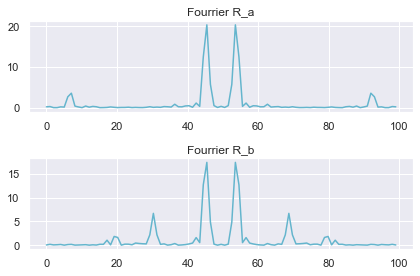

In [37]:
t_array = np.linspace(0, len(fourrier_a), len(fourrier_a))
plt.subplot(2, 1, 1)
plt.plot(t_array, fourrier_a, c = 'c')
plt.title('Fourrier R_a')

plt.subplot(2, 1, 2)
plt.plot(t_array, fourrier_b, c = 'c')
plt.title('Fourrier R_b')
plt.tight_layout()
plt.show()

Найдите максимум преобразования Фурье. Выведите соответствующую частоту:

In [38]:
freq = 2 * np.pi * np.argmax(fourrier_a) / len(fourrier_a)
print("maximum =", max(fourrier_a), "with frequency", freq)
freq = 2 * np.pi * np.argmax(fourrier_b) / len(fourrier_b)
print("maximum =", max(fourrier_b), "with frequency", freq)

maximum = 20.324273785521186 with frequency 2.8559933214452666
maximum = 17.447674161408994 with frequency 2.8559933214452666
